# Neural Network with Sigmoid Activation function using ADAM Optimizer

In [50]:
import numpy as np

class NeuralNetwork:
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        self.weights = np.random.rand(inputs.shape[1], outputs.shape[1])
        self.biases = np.random.rand(1, outputs.shape[1])
        self.learning_rate = 0.01
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.m = np.zeros_like(self.weights)
        self.v = np.zeros_like(self.weights)
        self.t = 0
        self.error_history = []
        self.epoch_list = []
        
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def sigmoid(self, x, deriv = False):
        if deriv == True:
            return self.sigmoid_derivative(x)
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x)*(1-self.sigmoid(x))
    
    def forward_pass(self):
        self.hidden = np.dot(self.inputs, self.weights) + self.biases
        self.output = self.sigmoid(self.hidden)
        
    def backward_pass(self):
        self.error = self.outputs - self.output
        self.d_output = self.error * self.sigmoid(self.output, deriv=True)
        self.d_weights = np.dot(self.inputs.T, self.d_output)
        self.d_biases = np.sum(self.d_output, axis=0)
        
    def update_weights(self):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * self.d_weights
        self.v = self.beta2 * self.v + (1 - self.beta2) * np.power(self.d_weights, 2)
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        self.weights += self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        self.biases += self.learning_rate * self.d_biases
        
    def train(self, iterations):
        for i in range(iterations):
            self.forward_pass()
            self.backward_pass()
            self.update_weights()
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(iterations)
            
    def predict(self, inputs):
        hidden = np.dot(inputs, self.weights) + self.biases
        return self.sigmoid(hidden)

inputs = np.array([[0,0.1,0.2]])
outputs = np.array([[1, 1, 1]])

nn = NeuralNetwork(inputs, outputs)
nn.train(1000)
print(nn.predict([[0, 0.5, 0.7]]))

[[0.99980435 0.99979342 0.9999189 ]]


Text(0, 0.5, 'Loss')

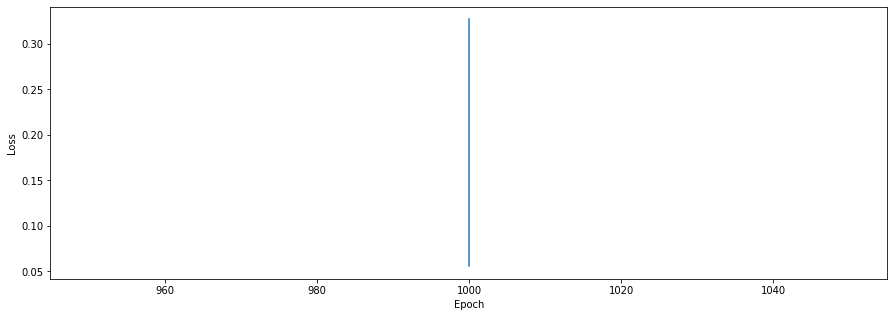

In [51]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
plt.plot(nn.epoch_list, nn.error_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')